# Loan Prediction Dataset

Table of Contents:

0. Problem Statement
1. Data Analysis
    - Data Description
    - Data Loading and Cleanup
    - Exploratory Data Analysis (EDA)
        - Distribution Plots
            - Outlier Removal
            - Skew-Normalization
        - Box Plots
        - Count Plots
        - Correlation Heatmap
        - ANOVA Statistical Test
2. Machine Learning Models
    - Data Preprocessing
    - Model Selection
    - Model Evaluation
3. Conclusions

## Problem Statement

**Problem:** This year, a bank is seeking to issue new loans to their customers. However, the number of applicants is such that it has become practically impossible to examine all loan applications individiually and on time. 

**Objective:** Given past loan approval data, help automatize the loan approval process so that the bank team does not get overwhelmed.

**Solution:** Build a Machine Learning Classification Model that will be trained on past, manually conducted loan approval data and be able to estimate the probability of an applicant being a suitable borrower of the bank's funds.

## 1. Data Analysis

### Data Description

*Dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset*

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

The dataset includes 4269 rows and 13 columns:
- `loan_id` (number)
- `no_of_dependents` (number of dependets of the applicant; number)
- `education` (education of the applicant; Graduate/Non Graduate)
- `self_employed` (yes/no)
- `income_annum` (annual income of applicant; number)
- `loan_amount` (number)
- `loan_term` (years)
- `cibil_score` (CIBIL credit score; number from 300 to 900)
- `residential_assets_value` (number)
- `commercial_assets_value` (number)
- `luxury_assets_value` (number)
- `bank_asset_value` (number)
- `loan_status` (Approved/Rejected)

### Data Loading and Cleanup

In [330]:
#Importing libraries
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from scipy.stats import skew, f_oneway, ttest_1samp, skew, kurtosis

from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [281]:
#Loading Data
df = pd.read_csv('loan_approval_dataset.csv')

In [282]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [283]:
#Setting index
df = df.set_index('loan_id')

In [284]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Every column name has a blank space before it. Let's clean that up.

In [285]:
#Removing whitespaces from column names
def rename_dataframe(df):
    for col in df.columns:
        df.rename(columns={ f'{col}' : f'{col.strip(' ')}'}, inplace=True)
    return df

In [286]:
df = rename_dataframe(df)
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [287]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


Not only are the column names infected with the 'leading whitespace', but so is every single string object inside of the dataset. This also requires cleaning.

In [288]:
#Automatically detecting which columns are of the string type by going through the first row
def declare_cat_num_cols(df):
    categorical_cols = []
    numerical_cols = []
    for i, col in enumerate(df.columns):
        if is_numeric_dtype(df.iloc[0,i])==False:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    return categorical_cols, numerical_cols

In [289]:
categorical_cols, numerical_cols = declare_cat_num_cols(df)

In [290]:
#Removing leading whitespaces from categorical data
def remove_leading_whitespaces(df, categorical_cols):
    for i, col in enumerate(df[categorical_cols].columns):
        df[col] = df[col].apply(lambda string: string.strip())
    return df

In [291]:
df = remove_leading_whitespaces(df, categorical_cols)

Checking if the column names are now fixed:

In [292]:
df.iloc[0,1]

'Graduate'

In [293]:
df.iloc[0,2]

'No'

In [294]:
df.iloc[0,-1]

'Approved'

Success!

In [295]:
#Checking for null-values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [296]:
#Checking for duplicates
df.duplicated().sum()

0

In [297]:
#Checking y-target balance of our dataset
print(f'Number of approved loans: {df[df['loan_status']=='Approved'].value_counts().sum()}')
print(f'Number of rejected loans: {df[df['loan_status']=='Rejected'].value_counts().sum()}')

Number of approved loans: 2656
Number of rejected loans: 1613


We see that there is around 1.5x more positive target values than there is negative ones. This will be taken into account when training our model.

In [298]:
#Descriptive Statistics to spot any errors in data
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


The above table shows that the minimum `residential_assets_value` is a negative number. At first sight, this might seem like an error. However, the value of a residential asset can indeed be negative if the current value of the property is lower than the mortgage value. Just in case, let us plot the negative `residential_assets_value` column values.

<Axes: xlabel='loan_id', ylabel='residential_assets_value'>

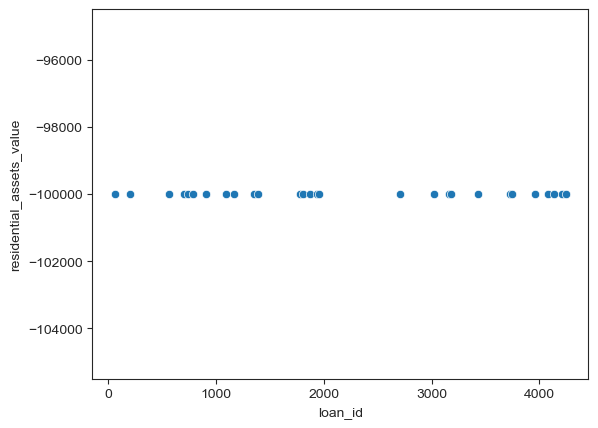

In [299]:
sns.scatterplot(data=df[df['residential_assets_value']<0], x=df[df['residential_assets_value']<0].index, y=df[df['residential_assets_value']<0]['residential_assets_value'])

In [300]:
#Number of negative residential asset values
df[df['residential_assets_value']<0].value_counts().sum()

28

Even though this value could theoretically be negative, because of the odd uniformity of negative value in this category, we will assume that these 28 data points are indeed erronous and will remove them.

In [301]:
len(df)

4269

In [302]:
df = df.query('residential_assets_value >= 0')

In [303]:
len(df)

4241

### Exploratory Data Analysis

### Distribution Plots

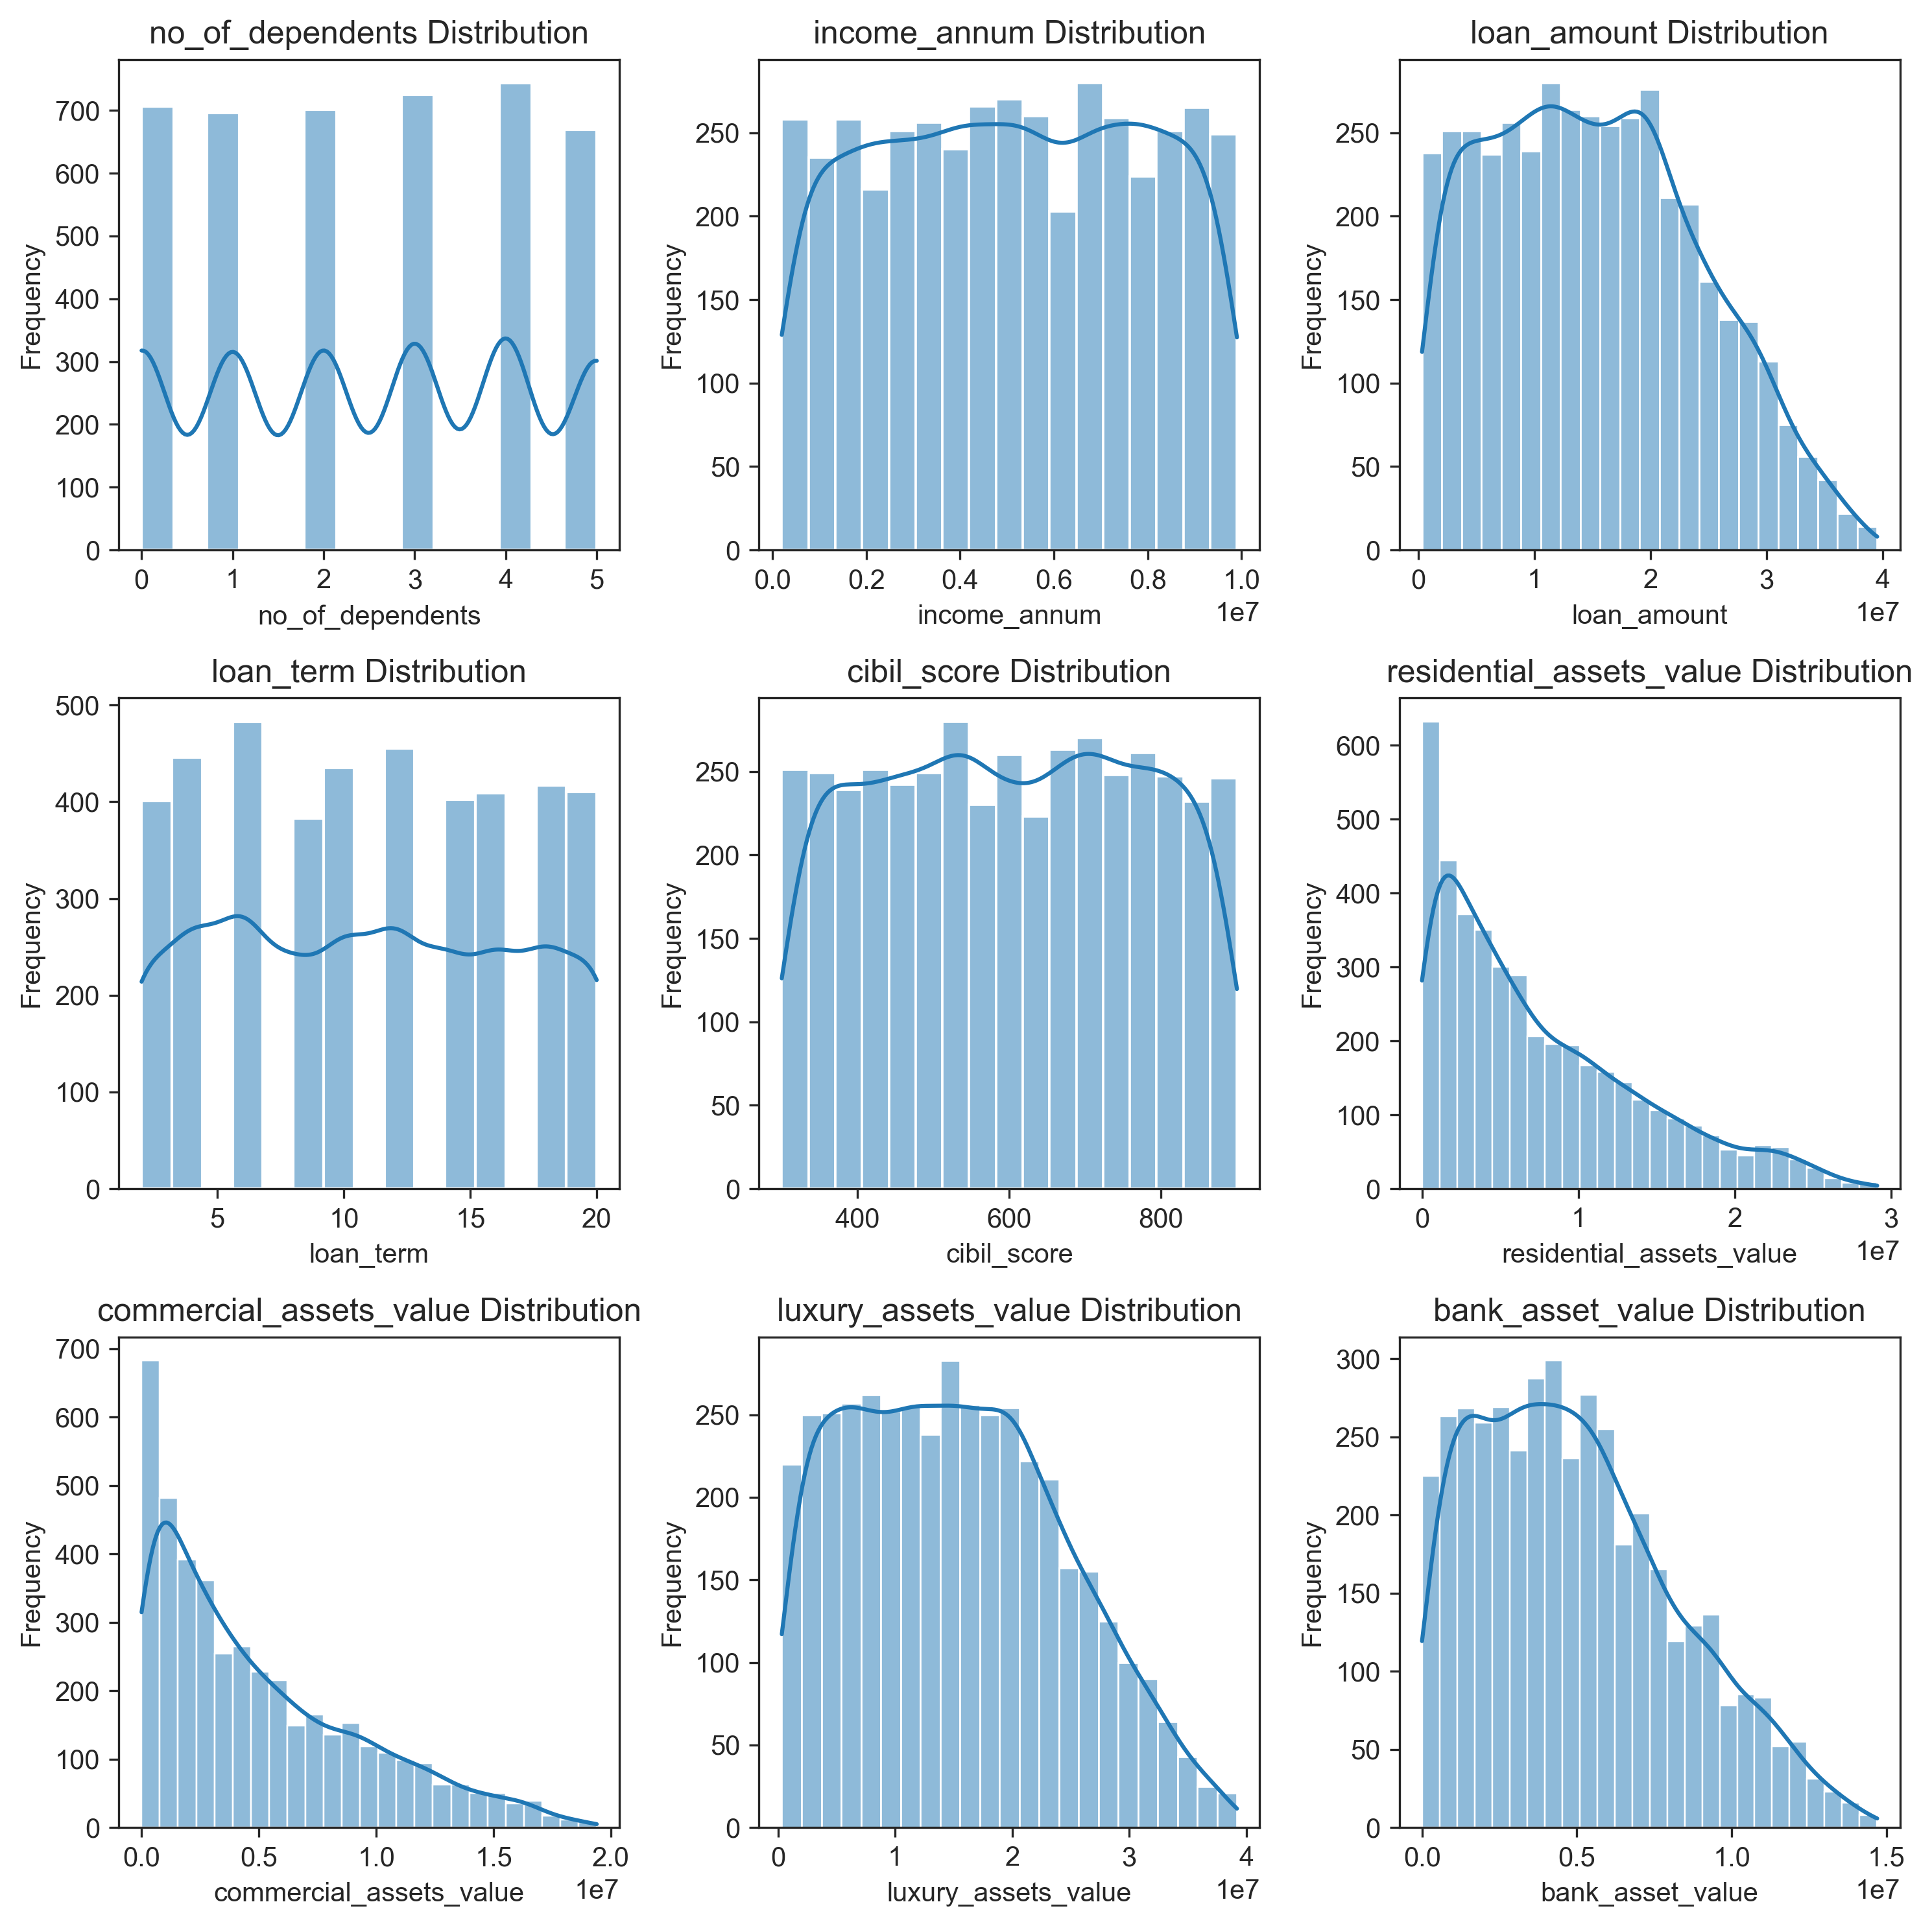

In [304]:
#Distribution plots for numerical features
fig= plt.figure(figsize=(10,10), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.histplot(df[col], kde=True)
    plt.ylabel("Frequency")
    plt.title(f'{col} Distribution')

plt.savefig('images/01_Distributions.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

We can see that the distribution plots for many of the features are very skewed. Features that are not normally distributed tend to degrade the performance of many Machine Learning models. The data, namely columns `loan_amount`, `residential_assets_valueb` ,`commercial_assets_value`, `luxury_assets_value` and `bank_asset_value` need skew-normalizing. Before that, we will begin by removing outliers from our data using a z-score outlier removal method.

#### Outlier removal

In [305]:
#Removing all outliers outside the 3 standard deviation range
def remove_outliers_3_std(df, numerical_columns):
    for i, col in enumerate(df[numerical_columns].columns):
        lower_lim = df[col].mean() - 3 * df[col].std()
        upper_lim = df[col].mean() + 3 * df[col].std()
        df = df[(df[col] >= lower_lim) & (df[col] <= upper_lim)]
    return df

In [306]:
#Checking number of removed outliers
df_no_outliers = remove_outliers_3_std(df, numerical_cols)
df.shape[0] - df_no_outliers.shape[0]

32

In [307]:
df = df_no_outliers

#### Skew-Normalization (+Standardization)

In [308]:
#Check skew of the numerical columns
for col in df[numerical_cols].columns:
    print(f"Skew of {col}: {skew(df[col])}")

Skew of no_of_dependents: -0.016027627444355565
Skew of income_annum: -0.012547298324105543
Skew of loan_amount: 0.30698545880151484
Skew of loan_term: 0.03747118780637047
Skew of cibil_score: -0.010228599197675402
Skew of residential_assets_value: 0.9483961615345969
Skew of commercial_assets_value: 0.9235007026445892
Skew of luxury_assets_value: 0.3256871517220695
Skew of bank_asset_value: 0.5598230843615853


We will be skew-normalizing columns `bank_asset_value`, `commerical_assets_value`, `residential_assets_value`, `loan_amount` and `luxury_assets_value`.

In [309]:
def normalize_skew(df, cols):
    power_transf = PowerTransformer('yeo-johnson', standardize=True)
    for col in df[cols].columns:
        df[col] = power_transf.fit_transform(df[col].values.reshape(-1,1))
    return df

In [310]:
df = normalize_skew(df, ['bank_asset_value', 'residential_assets_value', 'commercial_assets_value', 'loan_amount', 'luxury_assets_value'])

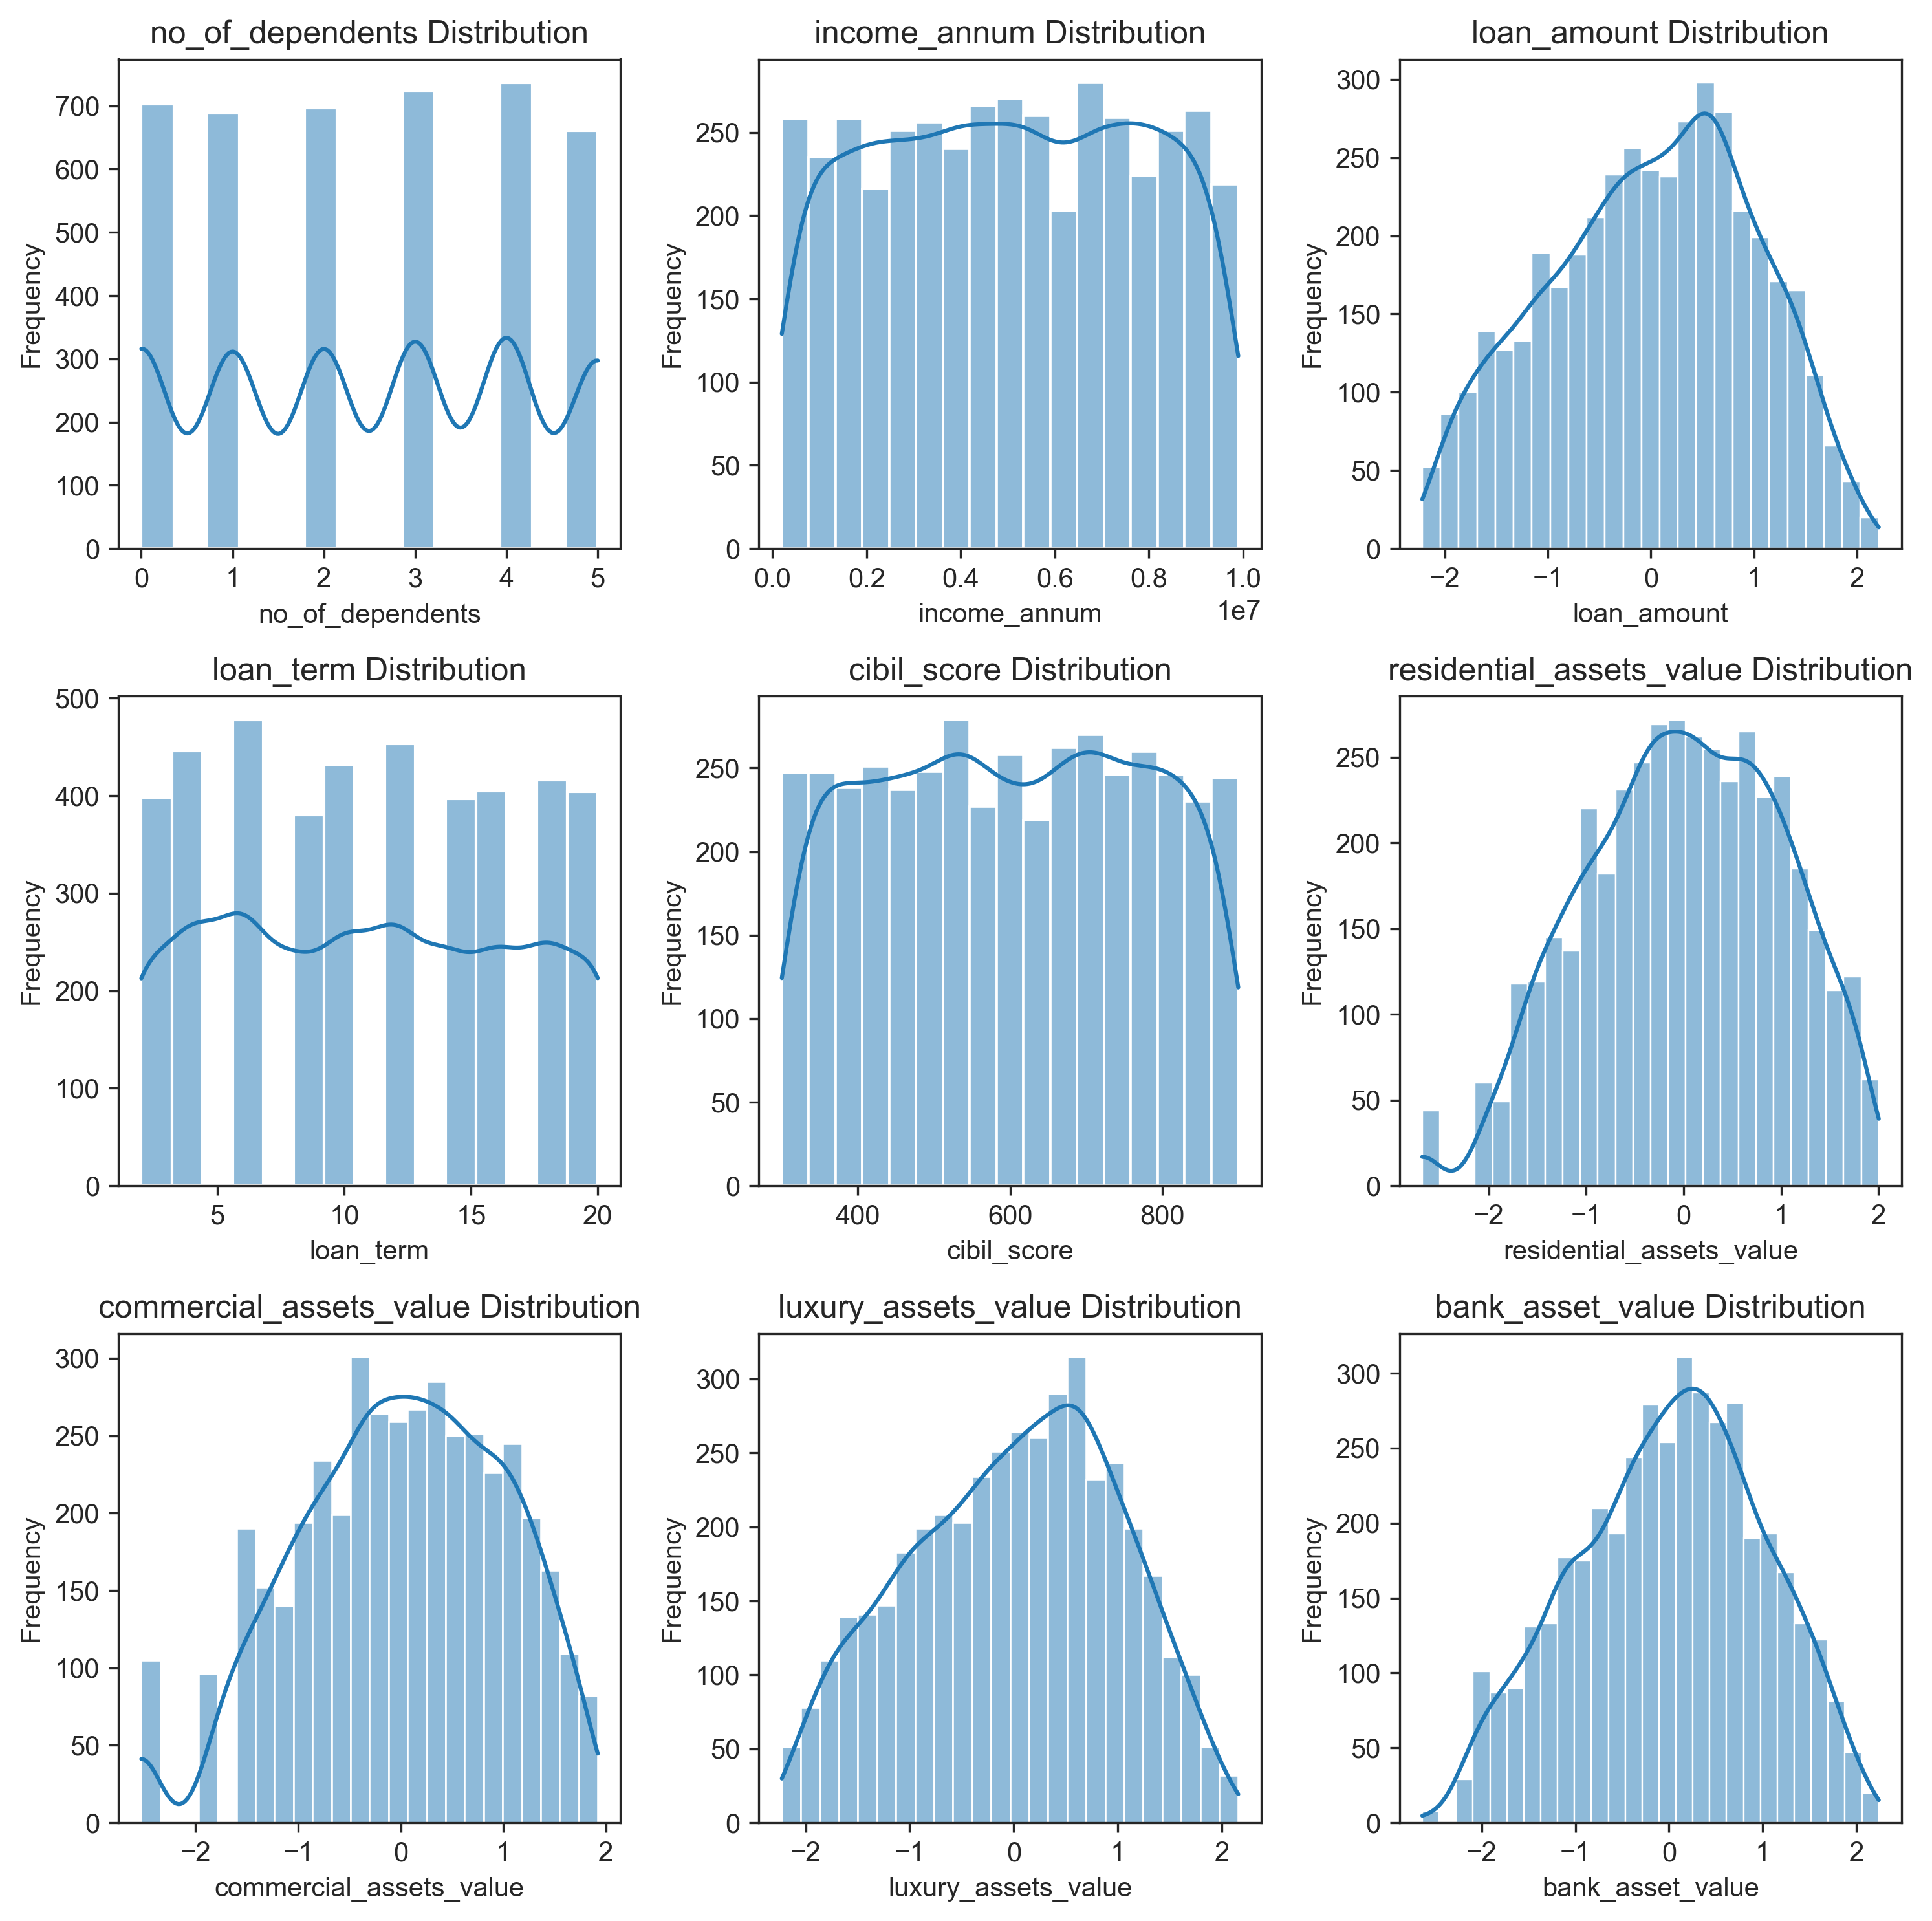

In [311]:
#Distribution plots for numerical features [skew-normalized]
fig= plt.figure(figsize=(10,10), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.histplot(df[col], kde=True)
    plt.ylabel("Frequency")
    plt.title(f'{col} Distribution')

plt.savefig('images/01_DistributionsFixed.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

### Boxplots

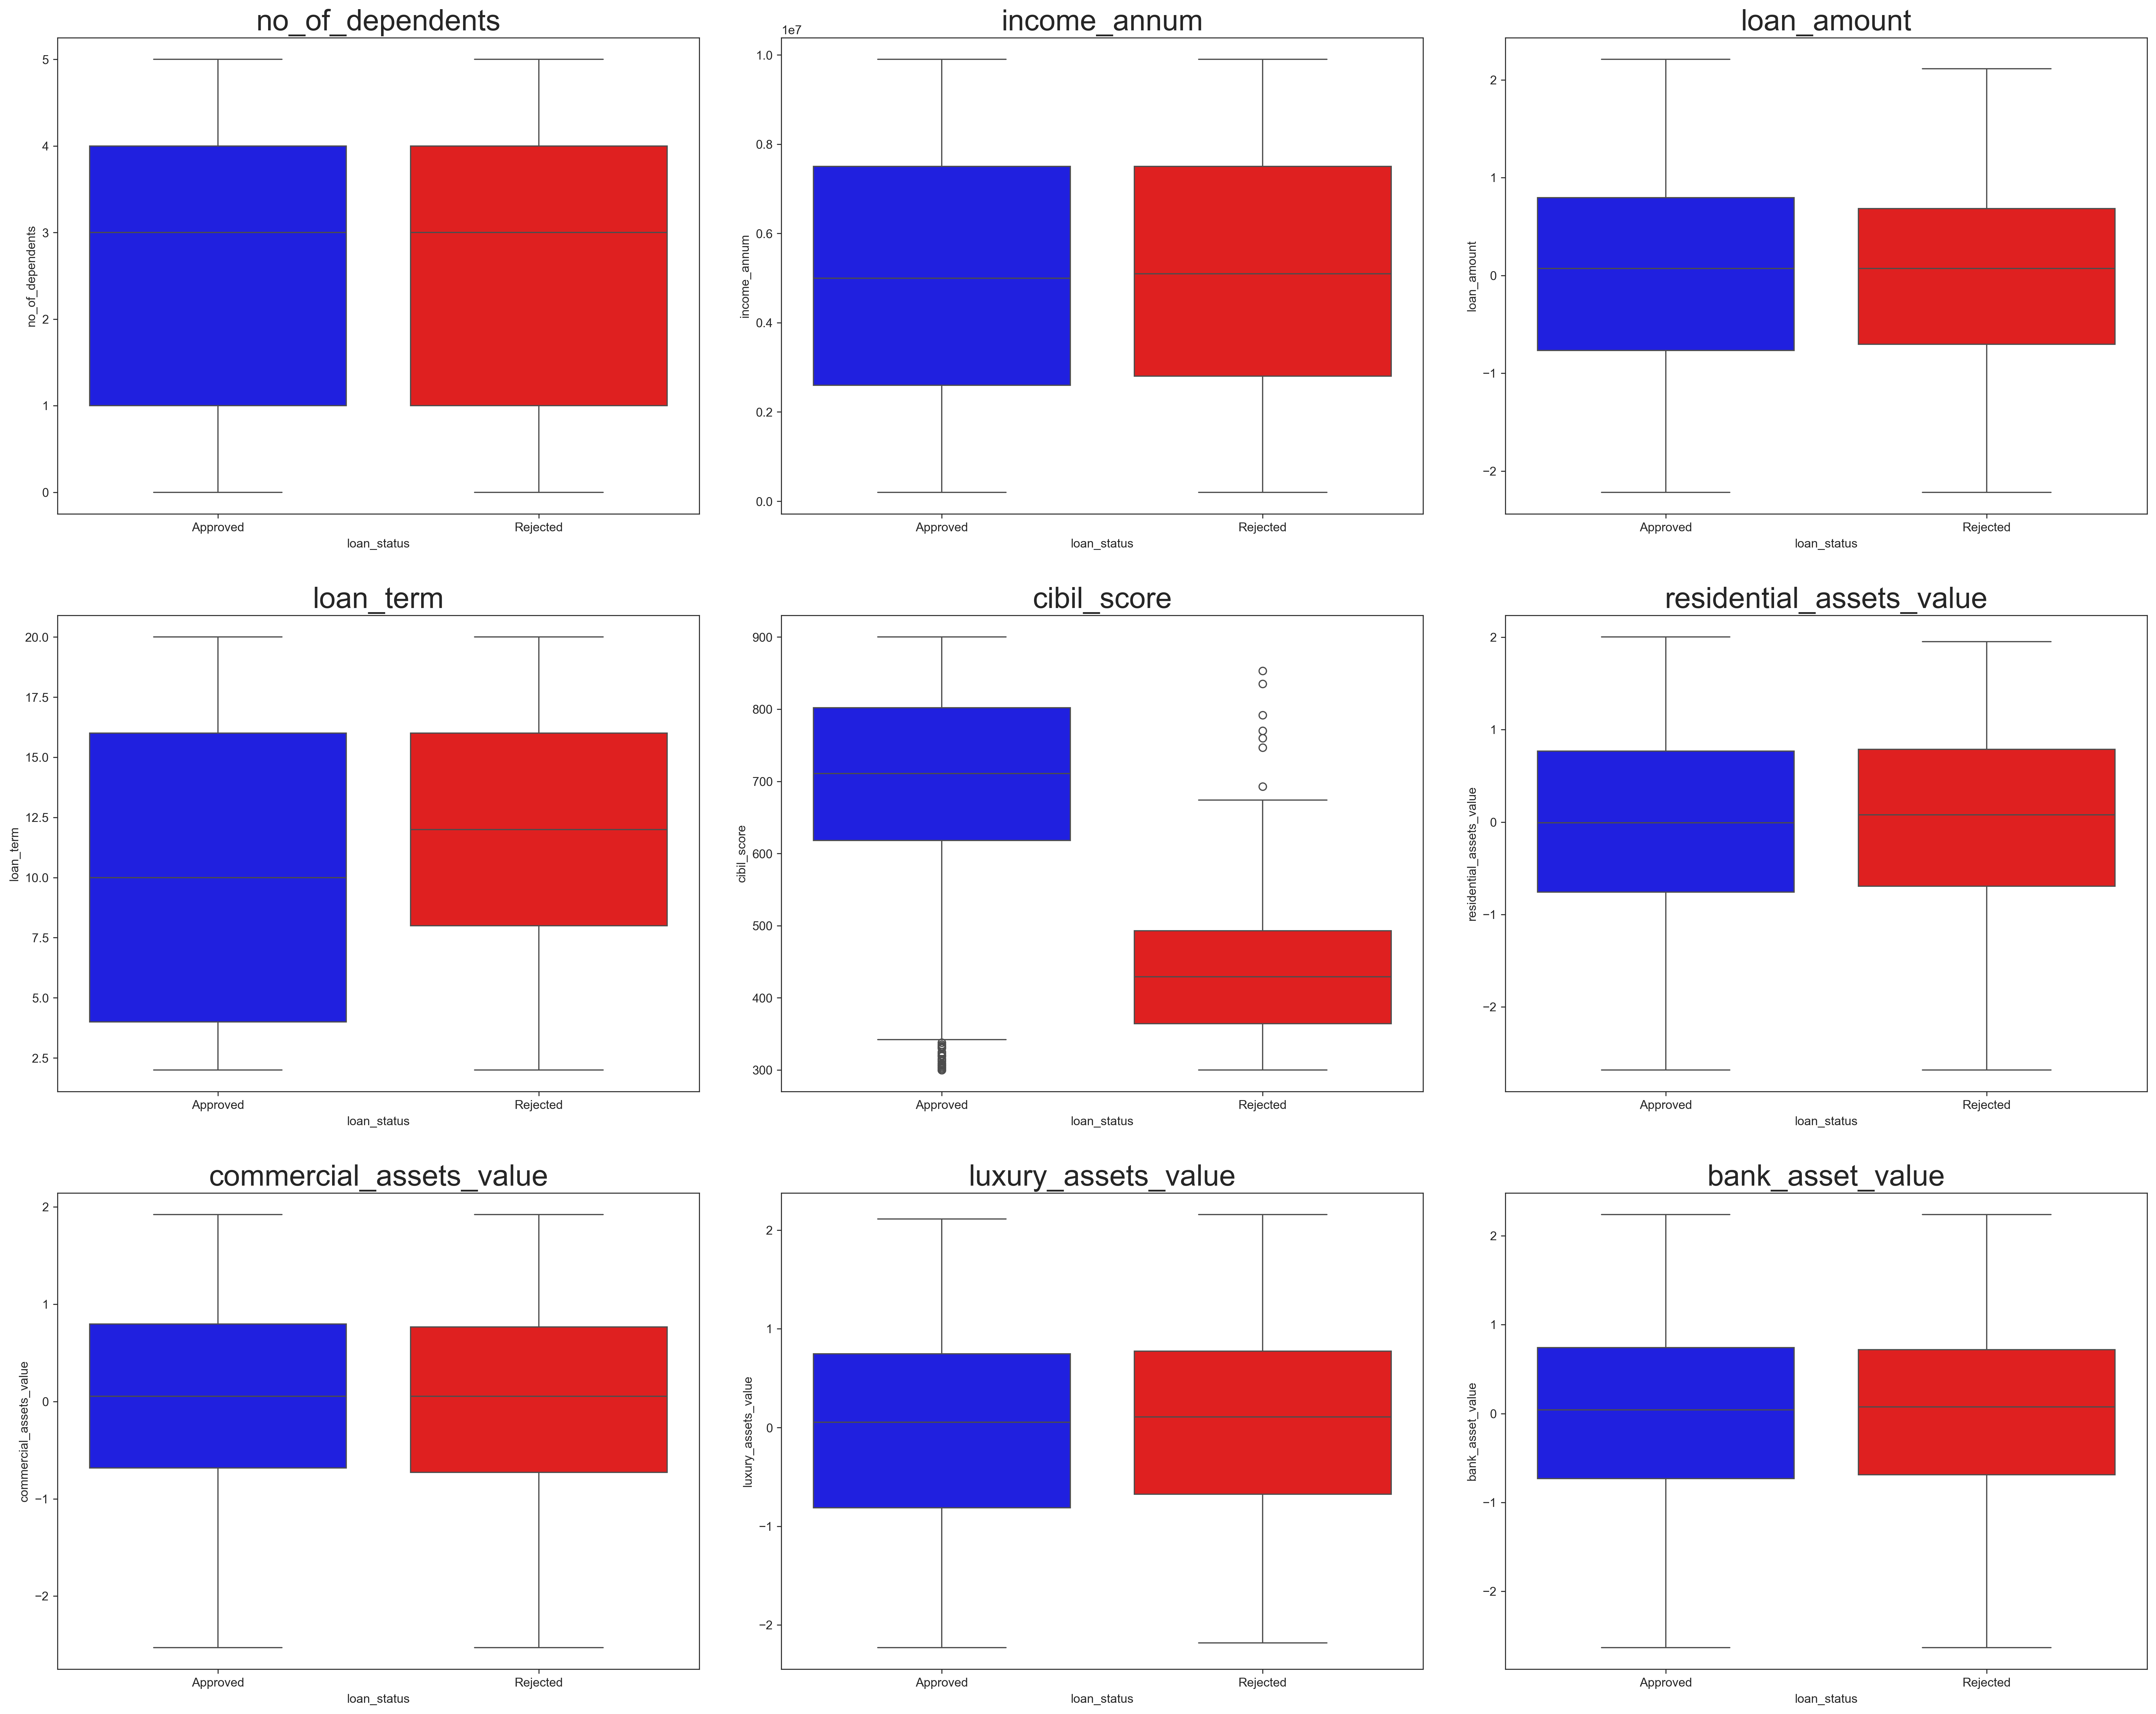

In [312]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.boxplot(x='loan_status', y=col, data=df, hue='loan_status', palette=["b", "r"])
    plt.title(f'{col}', fontsize=24)

plt.savefig('images/01_BoxPlots.png', bbox_inches='tight')
plt.tight_layout(pad=3)
plt.show()

The boxplots above seem to indicate that people who with low CIBIL score tend to get their loan rejected. It also seems like the group who had their loan rejected opted for a longer loan term, indicating a slight inverse relationship between approval probability and loan terms. All these observations will be quantitatively evaluated through the ANOVA statistical test. 

### Countplots

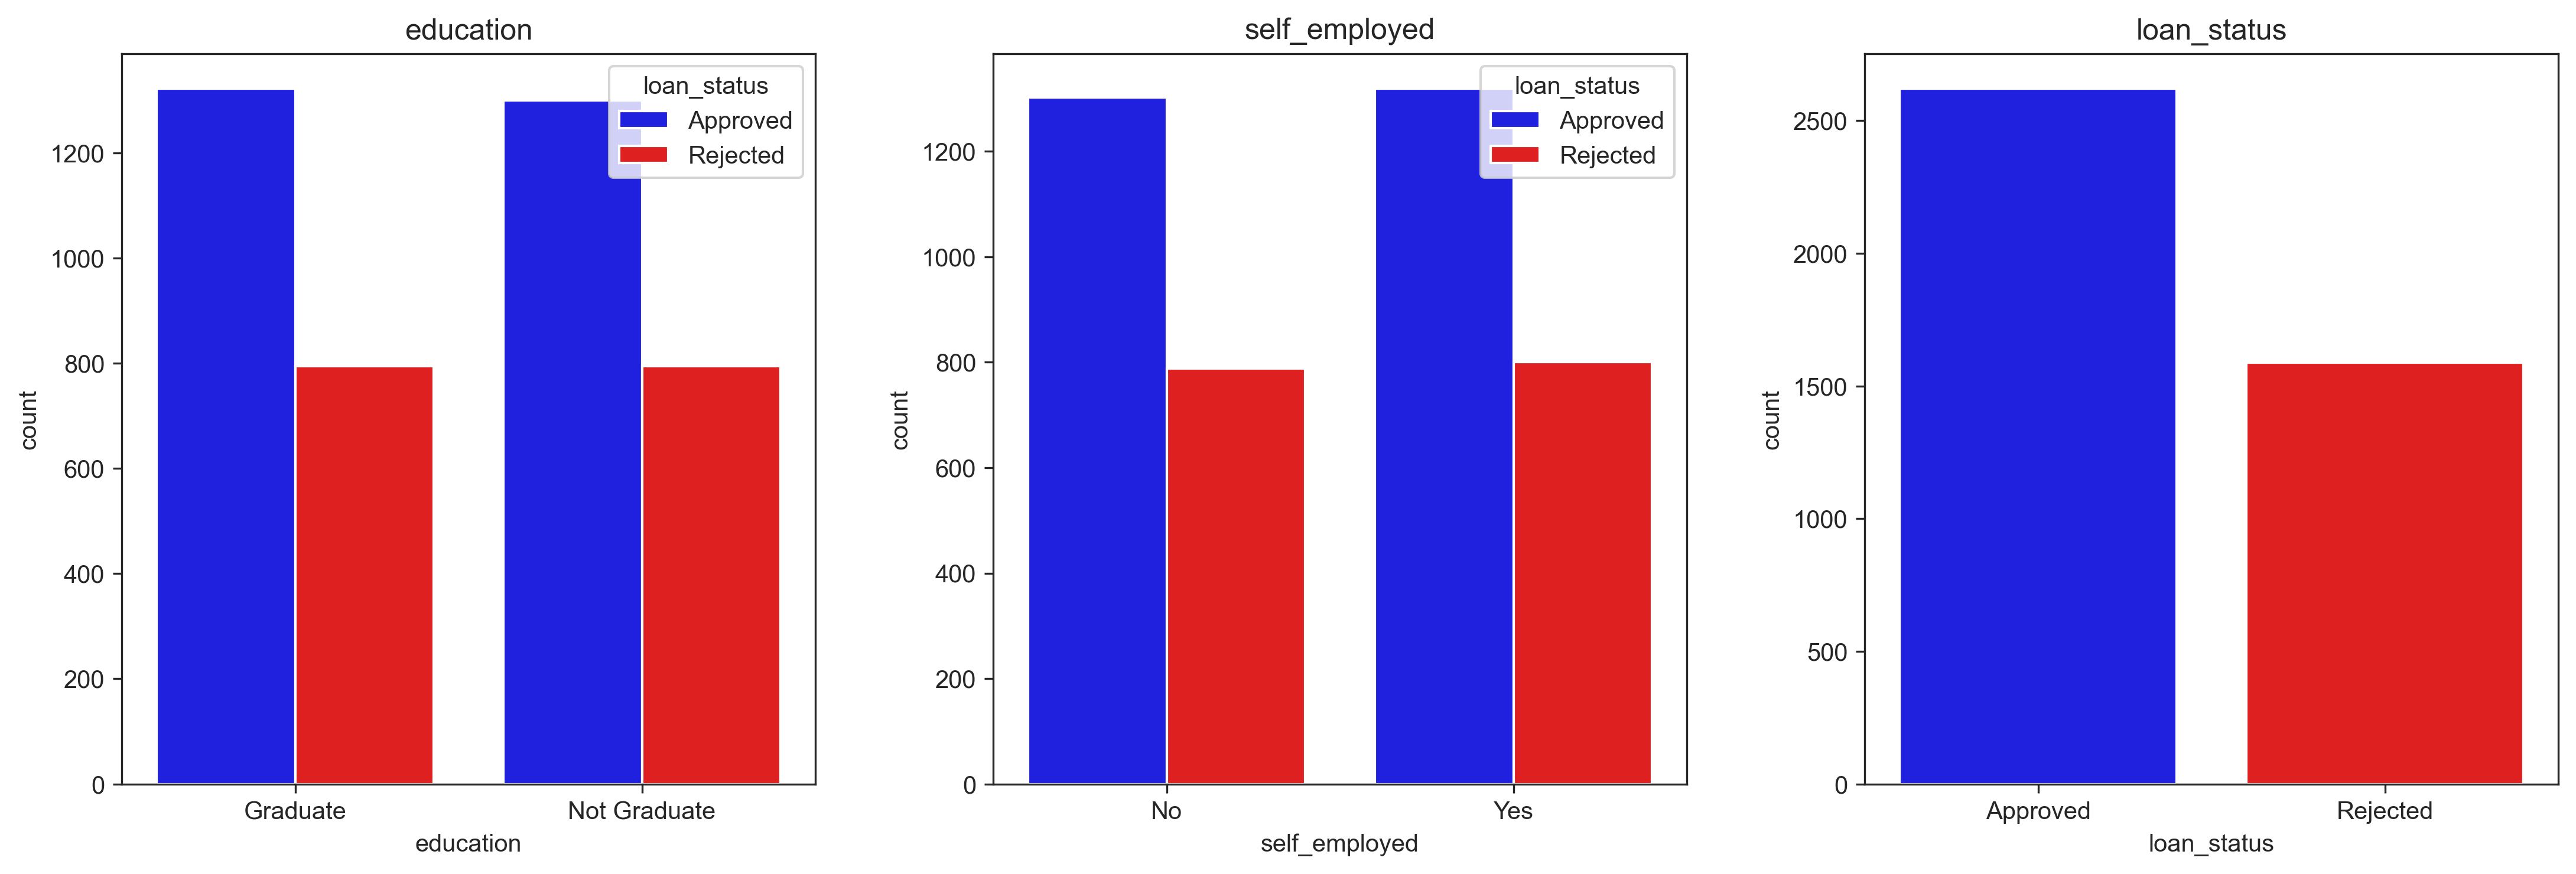

In [313]:
fig= plt.figure(figsize=(25,20), dpi=300)
for i, col in enumerate(categorical_cols):
    plt.subplot(4,5, i+1) #i+1 is the index of the subplot, from L to R, Up to Down
    sns.countplot(x=col, data=df, hue="loan_status", palette=["b", "r"])
    plt.title(f'{col}')

plt.savefig('images/01_CountPlots.png', bbox_inches='tight')
plt.tight_layout(pad=3)
plt.show()

The countplots above seem to indicate that the categories of education and self-employment have no overt predictive capability when it comes to loan approval probability. As was already stated, the majority of our data is target-positive (loans approved), meaning that this needs to be taken into account when training our model.

### Correlation Heatmap

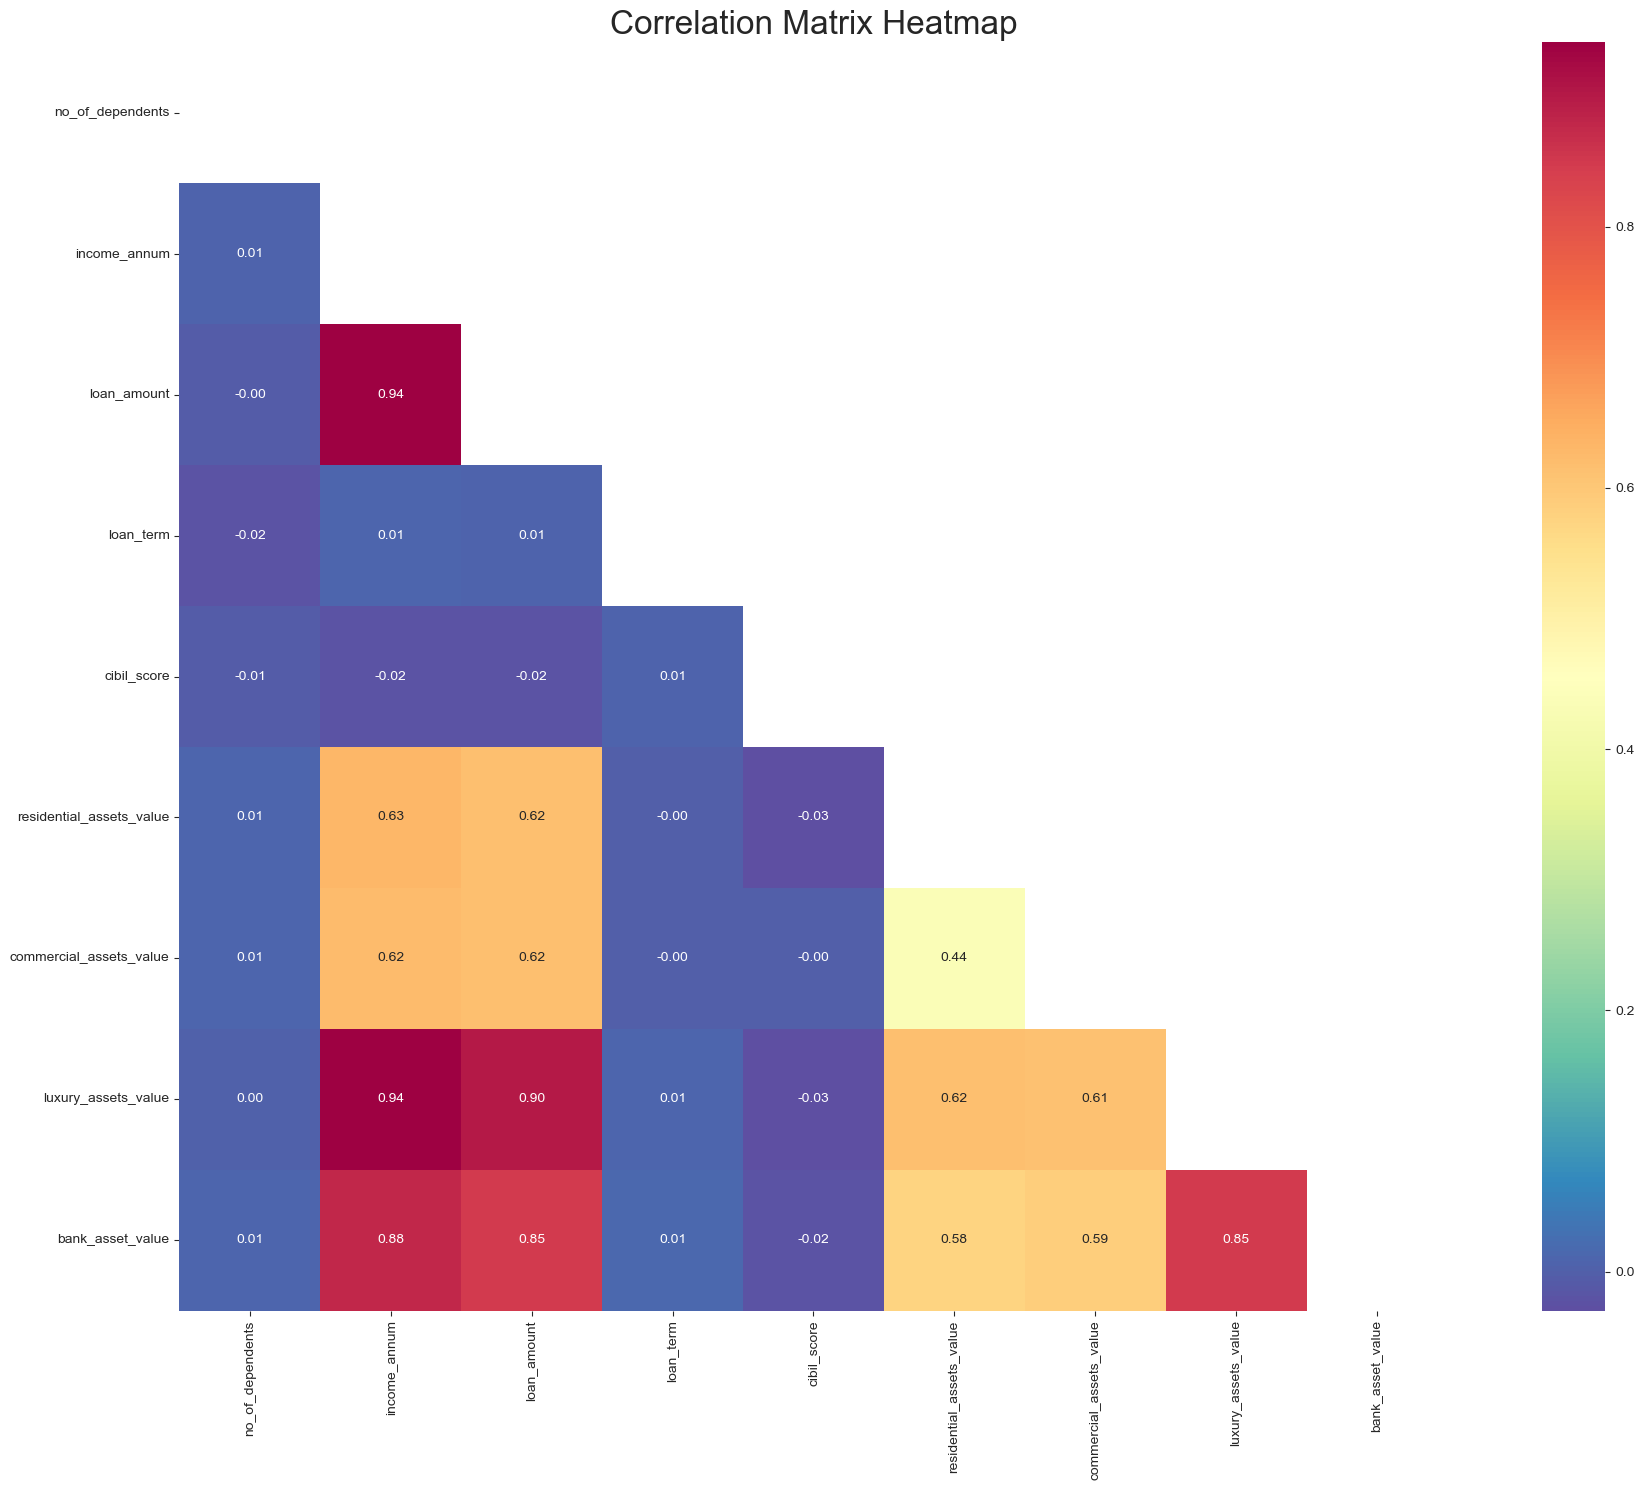

In [314]:
#Triangle Correlation Matrix in correlation heatmap form (for numerical columns)
mask = np.zeros_like(df[numerical_cols].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(20,15))
sns.heatmap(df[numerical_cols].corr(), mask= mask, square=True, annot=True, fmt='.2f', cmap ='Spectral_r', )
plt.title("Correlation Matrix Heatmap", fontsize=24)
plt.tight_layout()
plt.savefig('images/01_CorrHeatmap.png', bbox_inches='tight')
plt.show()

### ANOVA Statistical Test

In [315]:
#ANOVA test for checking statistical signifance in median difference of numerical categories for the `Approved` and `Rejected groups`.
print('---------------------------------------------------------------------------\nANOVA test for CIBIL score and loan term significance between Accepted and Rejected groups (95% confidence level)\n---------------------------------------------------------------------------')
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        unique_groups = df[cat_col].unique()
        if len(unique_groups) > 1:
            groups = [df[df[cat_col]==group][num_col] for group in unique_groups]
            f_stat, p_value = f_oneway(*groups)
            print(f'ANOVA for {num_col} grouped by {cat_col}:\n F-statistic = {f_stat}, p-value={p_value}, Statistical significance: {'Yes' if p_value < 0.05 else 'No'}')

---------------------------------------------------------------------------
ANOVA test for CIBIL score and loan term significance between Accepted and Rejected groups (95% confidence level)
---------------------------------------------------------------------------
ANOVA for no_of_dependents grouped by education:
 F-statistic = 0.11079430756265865, p-value=0.739258219309565, Statistical significance: No
ANOVA for no_of_dependents grouped by self_employed:
 F-statistic = 0.07259756140226163, p-value=0.7876048250111737, Statistical significance: No
ANOVA for no_of_dependents grouped by loan_status:
 F-statistic = 0.9512896114321409, p-value=0.3294473326592544, Statistical significance: No
ANOVA for income_annum grouped by education:
 F-statistic = 1.237565701086243, p-value=0.26600428211224597, Statistical significance: No
ANOVA for income_annum grouped by self_employed:
 F-statistic = 0.025326352052159294, p-value=0.873564202384641, Statistical significance: No
ANOVA for income_annum gr

The above results show that the only significant correlations are: a) between `loan_term` and `loan_status` and b) between `CIBIL score` and `loan_status`. Both confirm our suspicion about the impact of CIBIL score and chosen loan terms on loan approval.

# Machine Learning Models

## Data Pre-processing

In [326]:
#Standardizing all data
def standardize_data(df, num_col):
    scaler = StandardScaler()
    for col in df[num_col].columns:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

In [327]:
df = standardize_data(df, numerical_cols)

In [334]:
#Labeling categorical data
def label_cat_data(df, categorical_cols):
    labels = {}
    label_encoder = LabelEncoder()
    for col in df[categorical_cols].columns:
        df[col] = label_encoder.fit_transform(df[col])
        labels.update({col : label_encoder})
    return df

In [335]:
df = label_cat_data(df, categorical_cols)

In [336]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,-0.292469,0,0,1.637740,1.477998,0.193902,1.034355,-0.665051,1.895127,0.862805,0.953198,0
2,-1.472723,1,1,-0.337351,-0.182774,-0.506944,-1.062140,-0.580494,-0.370679,-0.584976,-0.347296,1
3,0.297657,0,0,1.458187,1.461870,1.595595,-0.545275,0.261071,0.234847,1.725322,1.921724,1
4,0.297657,0,0,1.134990,1.542096,-0.506944,-0.771767,1.401413,-0.045945,0.915454,0.930326,1
5,1.477910,1,1,1.709562,1.000325,1.595595,-1.265401,0.891270,0.870840,1.422954,0.190631,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,1.477910,0,1,-1.450585,-1.635128,0.193902,-1.642887,-0.553680,-1.237397,-1.426722,-1.521255,1
4266,-1.472723,1,1,-0.624637,-0.286838,1.595595,-0.237480,-0.230667,-0.154379,-0.314015,-0.906883,0
4267,-0.292469,1,0,0.524507,0.974040,1.245172,-0.829841,-1.098412,1.392038,0.438781,0.789997,1


## Model-Selection

For this dataset, we will be constructing a neural network classifier using TensorFlow.

## Model-Evaluation

# Conclusions